In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

In [3]:
CURRENT_DATA = '2021-09-24'
DIR_POSTFIX = '_prepared_1.3_normal'
PLOT_FILENAME_POSTFIX = '_prepared_1.3_normal'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_DATA

'D:\\git_reps\\molecular_dynamics\\data\\2021-09-24_prepared_1.3_normal'

In [5]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_PLOTS

'D:\\git_reps\\molecular_dynamics\\plots\\2021-09-24_prepared_1.3_normal'

In [6]:
radii = []
rdfs = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        df = pd.read_csv(os.path.join(PATH_TO_CURRENT_DATA, filename), sep=';')
        radii.append(df.radius.values)
        rdfs.append(df.rdf.values)
        
radii = np.array(radii)
rdfs = np.array(rdfs)

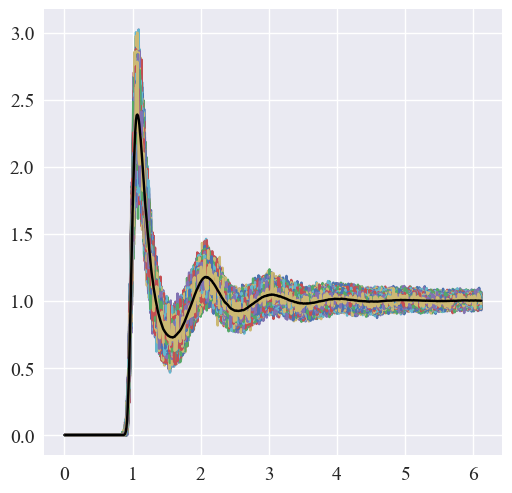

In [7]:
mean_rdf = rdfs.sum(axis=0) / rdfs.shape[0]

for r, g in zip(radii, rdfs):
    plt.plot(r, g)
plt.plot(radii[0], mean_rdf, color='black')

In [9]:
mean_rdf.sum()

539.3892322221047

In [17]:
from scipy.fft import rfft
x = np.array(rdfs[0])
y = rfft(x)
y

array([ 5.39426376e+02+0.00000000e+00j, -7.01618382e+01+2.42006885e+01j,
       -5.57671597e+01+4.67827408e+01j, -3.17581988e+01+6.24791684e+01j,
        9.17679222e-01+6.52609941e+01j,  3.64509016e+01+4.45702901e+01j,
        4.26228266e+01-1.16460529e+01j, -1.49547340e+01-2.98364758e+01j,
       -3.71161031e+01+6.52402118e+00j, -2.00895051e+01+3.43616233e+01j,
        7.66481018e+00+3.55477543e+01j,  2.42920454e+01+1.56924961e+01j,
        1.65671400e+01-9.32741457e+00j, -7.78118717e+00-1.41541852e+01j,
       -1.91332985e+01+3.18272420e+00j, -1.28567447e+01+1.84952749e+01j,
        4.33939839e+00+2.27000733e+01j,  1.41643940e+01+8.89516202e+00j,
        7.60110450e+00-3.87599985e+00j, -3.01516639e+00-5.76842118e+00j,
       -1.03447292e+01+1.51552981e+00j, -7.91409150e+00+1.01230950e+01j,
        9.80370659e-01+1.24138468e+01j,  7.08503414e+00+8.13907241e+00j,
        4.88515433e+00+4.26640913e-01j, -1.18419844e+00-3.11518051e+00j,
       -4.83354758e+00+1.56777493e+00j, -4.88301866

c:\users\farhutdinov.a\python3.9.5\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


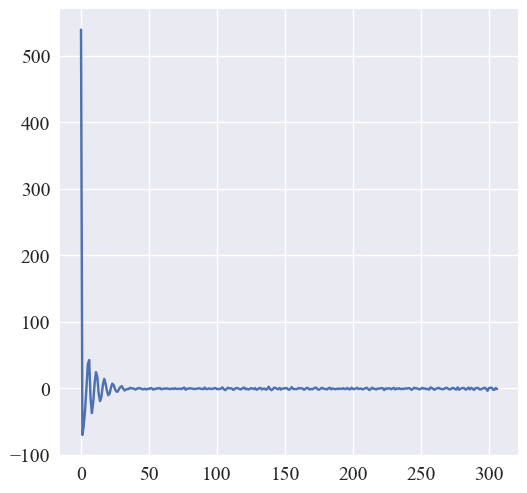

In [18]:
plt.plot(y)